Es común que una de las primera pregunta que le hagamos a nuestros datos, es si estos se distribuyen de manera normal o no. Si los analizaremos usando estadística paramétrica o no paramétrica suele, en muchos casos, depender de eso. *Python* ofrece diferentes maneras de testear normalidad:

In [1]:
import pandas as pd

Acá generaremos un *DataFrame* de *pandas*, con datos al azar (iniciando la semilla en ```42``` para que sea reproducible). La columna ```A``` se genera con datos al azar que siguen una distribución normal, mientras la ```B``` se genera siguiente una distribución de Pareto.

In [2]:
import random
random.seed(42)

In [3]:
N = 100
datos = pd.DataFrame( {"A": [ random.normalvariate(mu=0, sigma=1) for i in xrange(0,N) ], 
                       "B": [ random.paretovariate(3) for i in xrange(0,N) ] } )
datos.head()

,A,B
0,0.245326,1.111797
1,-0.496844,1.362716
2,1.254786,1.524233
3,-0.138059,1.078837
4,-0.975820,1.398300


Una de las primeras cosa que podemos hacer, es observar el perfil de densidad de los datos.

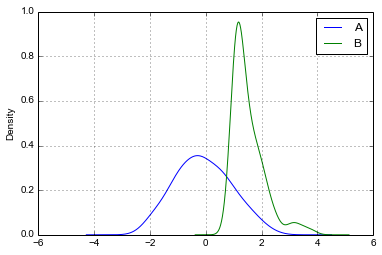

In [4]:
%matplotlib inline
datos.plot(kind="density");

**pandas** permite fácilmente calcular la [kurtosis](http://es.wikipedia.org/wiki/Curtosis) (debe valer 0 para la normal) y el [skewness](http://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) que mide la asimetría (debería valer 0 para la normal)

In [5]:
datos.kurtosis()

A   -0.536944
B    3.299753
dtype: float64

In [6]:
datos.skew()

A    0.159557
B    1.752639
dtype: float64

Otra manera útil de testear normalidad es realizar un [qq plot](http://es.wikipedia.org/wiki/Gr%C3%A1fico_Q-Q). Por defecto, **```probplot```** mide contra una distribución normal, dando el *qqplot* típico para testear normalidad (es posible testear otras distribuciones):

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt

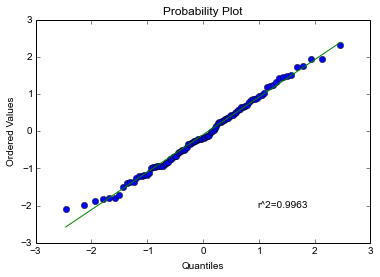

In [8]:
stats.probplot(datos.A, plot=plt);

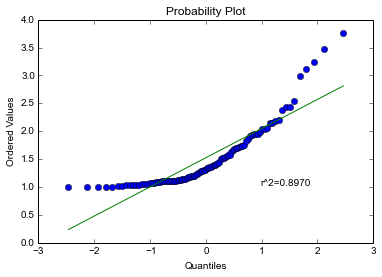

In [9]:
stats.probplot(datos.B, plot=plt);

Finalmente, **scipy** nos ofrece un test de normalidad. El segundo parámetro es el *p-value* del test. Si este es muy chico, por ejemplo menor a 0.05, podemos rechazar la hipótesis de normalidad.

In [10]:
stats.normaltest(datos.A)

(2.2777606671421942, 0.32017731298422131)

In [11]:
stats.normaltest(datos.B)

(42.823821322915407, 5.0225625344107572e-10)

In [12]:
stats.normaltest?